# Pipeline Tester
IPython notebooks are a great way to develop, test, and showcase image processing pipelines. Use this notebook to help visualize each stage of your pipeline. When you are ready to start part 2 of the project go to file -> download as -> python (.py) so you can import any function you created here.

## Setup
This section just imports the necessary libraries and loads the test image 

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

img_raw = cv2.imread("lanes.jpg")

## Preprocessing
In this section prepares the image for the rest of the pipeline. Consider resizing, cropping, blurring, applying a mask, or partitioning the image here.

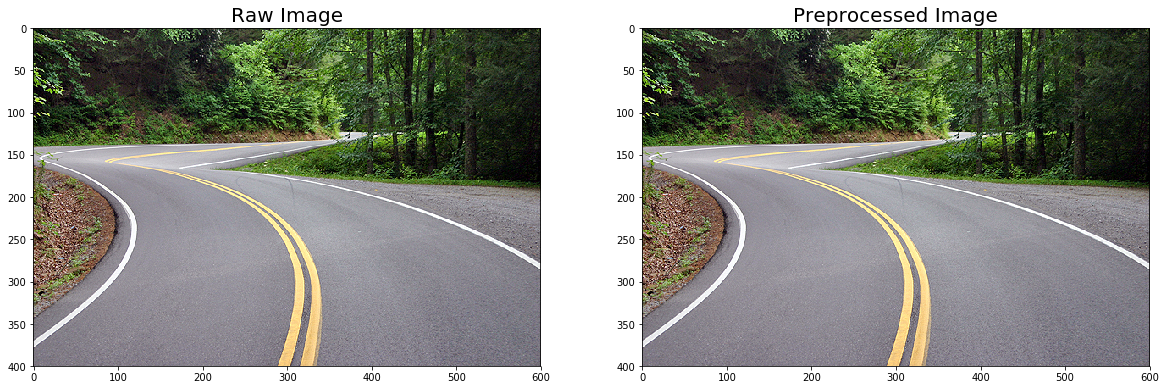

In [2]:
def preprocess(img):
    # TODO: your code here
    return img

img_pre = preprocess(img_raw)

plt.figure(figsize=(20,20))
plt.subplot(121)
plt.title("Raw Image", fontsize=20)
plt.imshow(img_raw[:,:,(2,1,0)])
plt.subplot(122) 
plt.title("Preprocessed Image", fontsize=20)
plt.imshow(img_pre[:,:,(2,1,0)])

## Transformations
Here consider transforming the image to a different color space, applying a color threshold, applying a perspective transformation, or a similiar operation. While this could be considered more preprocessing I've seperated it out into its own step for ease of debugging.

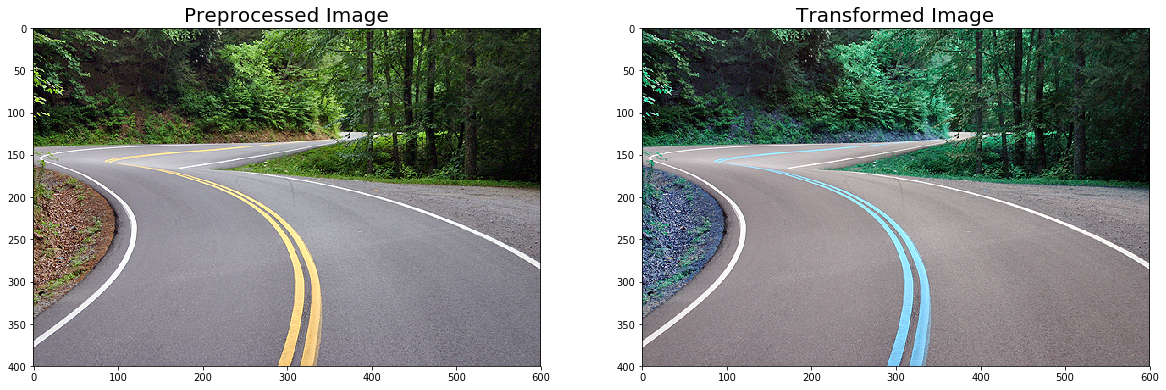

In [3]:
def transform(img):
    # TODO: your code here
    return img

img_trans = transform(img_pre)

plt.figure(figsize=(20,20))
plt.subplot(121)
plt.title("Preprocessed Image", fontsize=20)
plt.imshow(img_pre[:,:,(2,1,0)])
plt.subplot(122) 
plt.title("Transformed Image", fontsize=20)
plt.imshow(img_trans, cmap='gray')

## Feature Extraction
In this step use canny edges, the hough transform, your own algorithm, or any combination thereof to select lane pixels in the image. 

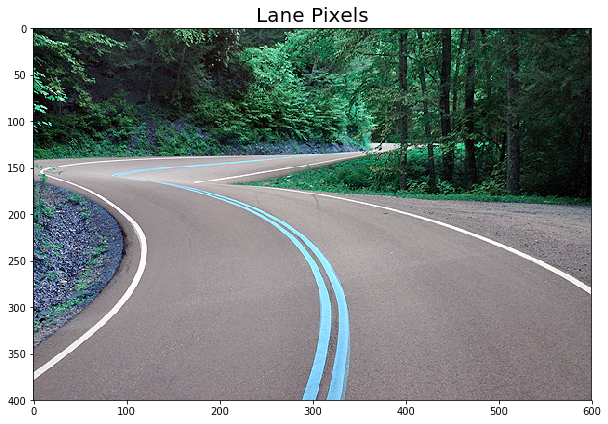

In [4]:
def lane_pixels(img):
    # TODO: your code here
    return img

img_lane = lane_pixels(img_trans)


plt.figure(figsize=(10,10))
plt.title("Lane Pixels", fontsize=20)
plt.imshow(img_lane, cmap='gray')

## Lane Line Fitting / Position Estimation
Here fit polynomials to the left and right lane lines. You can use opencv's built in hough transform, numpy's poly fit (which uses least squares to fit a polynomial of user defined order), or any other method as long as you use no libraries beyond numpy and opencv. For example, you could write your own hough tranfsorm to fit lines to a parabolic model y = a + bx + cx^2. Once you have fit a model to the lanes, use it to estimate the car's x position inside the lane. Use a coordinate system with 0 placed on the left lane line. For example in the above image if you deteted a lane line at x = 300 and x = 600 then your coordinate system would be [0, 300]. You can assume the camera is placed in the center of the car.

In [5]:

# Here are some examples of lane polynomials.
poly_left = [1.28526510e-05, -1.56755218e-02,  6.06658643e+00, -4.32990741e+02]
poly_right = [-1.16718928e-02,  7.93217666e+00, -7.12537601e+02]

## Results
Here use the function `draw_lanes` to visualize your model of the lane lines

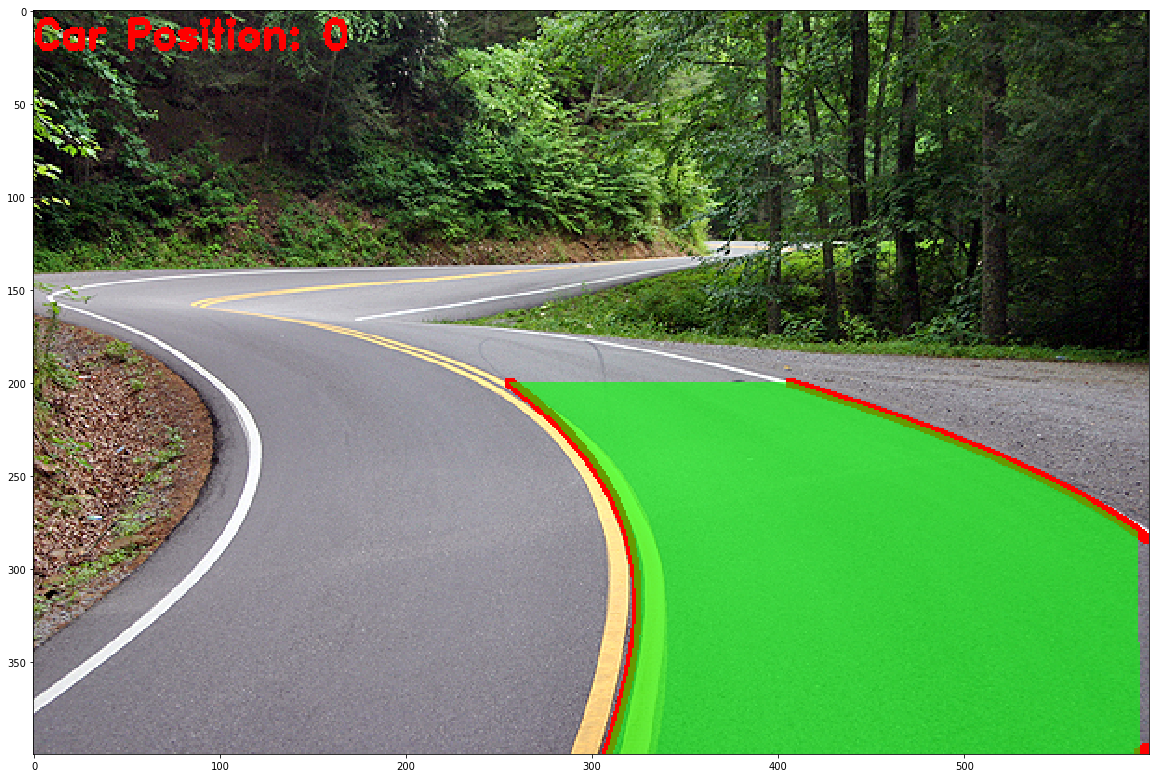

In [6]:
def draw_lanes(poly1, poly2, y, img):
    '''
    Draws two lane lines on the road defined by polynomials 1 and 2.
    The polynomials should be passed as an array. For example if the left
    lane was described by the polynomial 1 + 2x + 3x^2 you would pass
    the array [1, 2, 3]. Y is the domain the polynomials are defined over
    and img is the image that the lanes will by drawn on.
    '''
    poly1 = np.poly1d(poly1)
    poly2 = np.poly1d(poly2)
    lanes = np.zeros(img.shape)
    
    x = poly1(y)
    mask = np.bitwise_and(x >= 0, x < img.shape[1]-1)
    y_safe = (y[mask] + 0.5).astype(int)
    x_safe = (x[mask] + 0.5).astype(int)
    lanes[y_safe,x_safe] = 255
    points = np.vstack((x_safe[::20], y_safe[::20]))
    last = np.array([x_safe[-1], y_safe[-1]]).reshape(2, 1)
    lane_points = np.hstack((points, last))
    
    x = poly2(y)
    mask = np.bitwise_and(x >= 0, x < img.shape[1]-1)
    y_safe = (y[mask] + 0.5).astype(int)
    x_safe = (x[mask] + 0.5).astype(int)
    lanes[y_safe,x_safe] = 255
    points = np.vstack((x_safe[::20], y_safe[::20]))
    points = np.fliplr(points)
    last = np.array([x_safe[-1], y_safe[-1]]).reshape(2, 1)
    lane_points = np.hstack((lane_points, last, points))
    
    lane_points = lane_points.T
    
    lanes = cv2.dilate(lanes, np.ones((5,5), np.uint8), iterations=1)
    points = np.argwhere(lanes == 255)
    img[points[:,0],points[:,1]] = (0, 0, 255)
    
    overlay = np.copy(img)
    
    cv2.fillConvexPoly(overlay, np.int32(lane_points), (0, 255, 0))
    alpha = 0.6
    cv2.addWeighted(overlay, alpha, img, 1-alpha, 0, img)
    return img

# replace this with your estimate
car_position = 0

# y is the domain the lane polynomials are defined over. Feel free to change this
y = np.arange(img_raw.shape[0]/2, img_raw.shape[0])
img_lanes = draw_lanes(poly_right, poly_left, y, np.copy(img_raw))
cv2.putText(img_lanes, "Car Position: {}".format(car_position), (0, 20), cv2.FONT_HERSHEY_DUPLEX, 0.7, (0, 0, 255), 2, cv2.LINE_4)
plt.figure(figsize=(20,20))
plt.imshow(img_lanes[:,:, (2,1,0)])